## Analyse the Publications data from Kenya¶
So we managed to download about 14488 paper abstracts with meta-data from Kenyan Authors. Now we need to make sense of these data and identify trends. We are asking questions like:

1. Changes in the number of papers published over time (Yearly)
2. Changes in the number of open access papers over the years (Keep in mind that access or the lack thereof may be linked to embargo periods)
3. Collaboration trends (How can we get this information?
4. What else can we find out?

In [1]:
import matplotlib
matplotlib.use("Agg")
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

We began by installing matplotlib to assisting in plotting of the data 

In [3]:
!pip install ggplot

In [4]:
from ggplot import *

AttributeError: module 'pandas' has no attribute 'tslib'

In [5]:
from plotnine import *

ImportError: cannot import name 'factorial'

In [6]:
data = pd.read_csv('../data/PMID_PMC_Journal_Year_Kenya3.csv', index_col='Pmid')

In [7]:
data.head()

,Journal,Year,Month,Pmcid,Status
Pmid,,,,,
10022051,Preventive veterinary medicine,1999.0,1.0,NaN,closed
10024569,Infection and immunity,1999.0,3.0,PMC96455,open
10030753,Veterinary parasitology,1999.0,2.0,NaN,closed
10048769,Journal of interferon & cytokine research : th...,1999.0,1.0,NaN,closed
10048831,International journal for parasitology,1999.0,1.0,NaN,closed


In [8]:
data.columns

Index(['Journal', 'Year', 'Month', 'Pmcid', 'Status'], dtype='object')

In [9]:
data.Year.head()

Pmid
10022051    1999.0
10024569    1999.0
10030753    1999.0
10048769    1999.0
10048831    1999.0
Name: Year, dtype: float64

## Number of Journals per Year
Now we need to check if the number of Journals Published By Kenyans over the years.

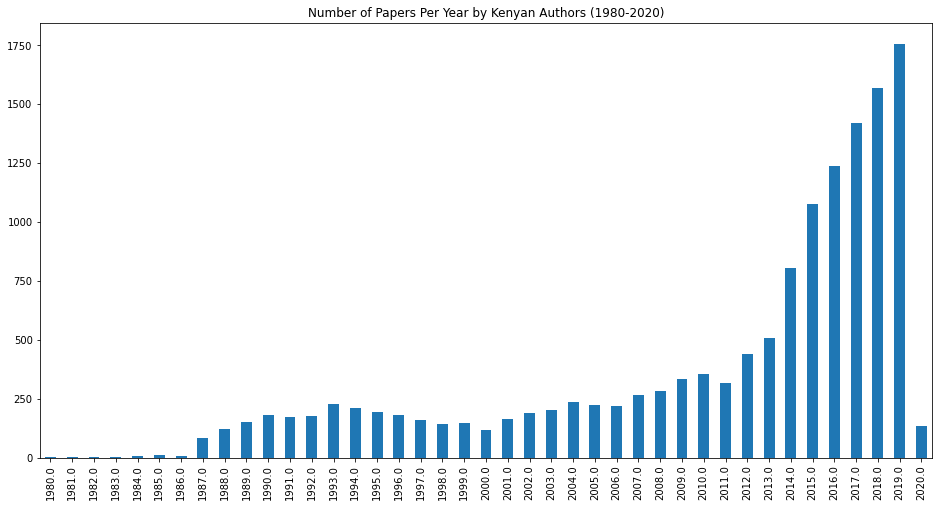

In [23]:
data['Year'].\
value_counts().sort_index().plot(kind='bar',
                                 title='Number of Papers Per Year by Kenyan Authors (1980-2020)',
                                 figsize=(16, 8), )

#plt.savefig('../plots/papers_per_year_Kenya.png')  # saves the current figure

In [ ]:
plot_journals = data.Journal.value_counts()[data.Journal.value_counts() > 50]
plot_journals.plot(kind='barh', title='Number of papers per Journal', figsize=(45, 35),fontsize = 30, xticks = "count")
# plt.savefig('../plots/papers_per_jornal_kenya.png')  # saves the current figure


From the figure above, we can observe that the East Africa Medical Journal is by far the most popular followed by Plos One Journal for Kenyan Authors. This is followed in a distant second by Malaria Journal. Most of these are journals specific to the diseases affecting Africa: Malaria and Neglected Tropical Diseases.

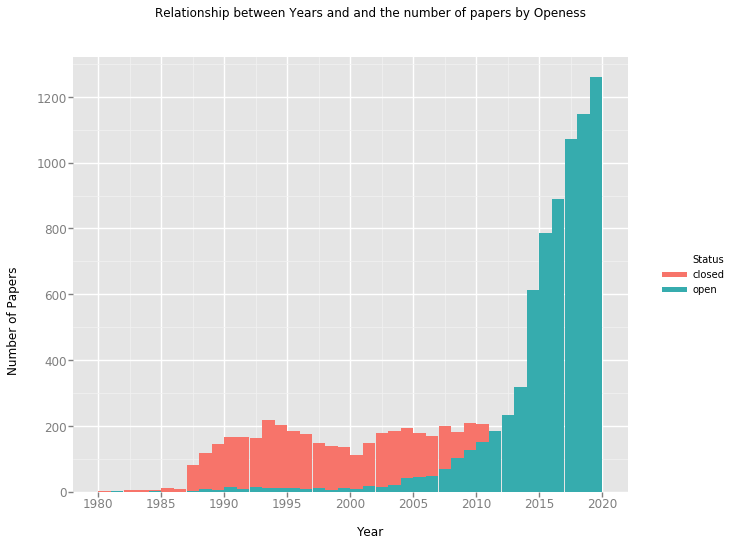

In [26]:
#P=ggplot(data, aes(x='Year', fill='Status')) +geom_histogram(binwidth=1) + \
#ggtitle("Relationship between Years and the number of papers by Openess") + xlab("Year") + ylab("Number of Papers")
#P
#P.save('plot1.png')
p=ggplot(data, aes(x='Year', fill='Status')) +\
    geom_histogram(binwidth=1) + \
ggtitle("Relationship between Years and and the number of papers by Openess") \
+ xlab("Year") + ylab("Number of Papers")

p.save('../plots/statusOpennessYear_Kenya.png')

in this diagram we can observe an increase in the number of open access articles (articles that do contain a pmcid)  as we close towards the 21 century(2000-2020) and a reduction in the closed access paper ( articles that donot contain a pmcid) 

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


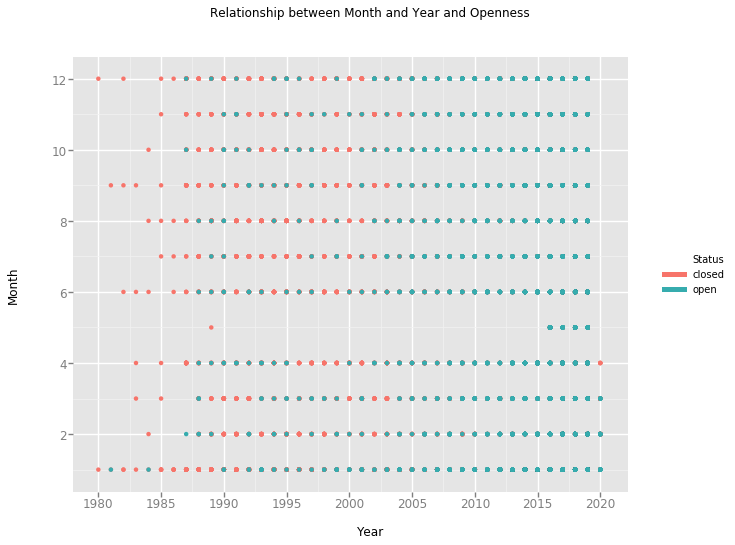

In [29]:
A=ggplot(data , aes(x = 'Year', y = 'Month',
                color='Status')) + geom_point() + \
ggtitle("Relationship between Month and Year and Openness") \
+ xlab("Year") + ylab("Month")

#save 
A.save('../plots/statusOpennessYear_months.png')